In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


Importing the 2018-2019 season games into a DataFrame. Incorporating at least two more datasets from the Basketball Reference website and add them to your DataFrame (ie the 2017-2018 season, prior year standings, other player or team data, etc).

In [2]:
data18 = pd.read_csv('https://gitlab.com/CEADS/DrKerby/python/raw/master/basketball.csv')

In [3]:
data18.head(5)

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,Box Score,NaN,18055,NaN


In [4]:
# We have to rename some columns before we move from here.
data18.columns = ['Date','Start(Et)','Visitorteam','VisitorPts','Hometeam','HomePts','BoxScore','OT','Attendance','Notes']

In [5]:
data18.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,BoxScore,OT,Attendance,Notes
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,Box Score,NaN,18055,NaN


In [6]:
data18.shape

(1312, 10)

In [7]:
data18.Notes.isnull().sum()

1309

In [8]:
data18.OT.isnull().sum()

1241

In [9]:
# lets just get rid of notes and OT for now, as there more null values than values.
data18.drop('BoxScore',axis=1, inplace =True)

In [10]:
standings = pd.read_csv('https://gitlab.com/CEADS/DrKerby/python/raw/master/standings.csv',skiprows=1)
standings.head()

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Houston Rockets,65-17,34-7,31-10,24-6,41-11,6-4,9-1,9-1,...,21-4,5-3,38-8,5-3,12-1,9-5,10-4,12-0,14-1,3-3
1,2,Toronto Raptors,59-23,34-7,25-16,40-12,19-11,12-4,14-4,14-4,...,18-7,5-7,33-5,4-2,9-5,11-3,10-5,9-2,12-4,4-2
2,3,Golden State Warriors,58-24,29-12,29-12,24-6,34-18,9-1,6-4,9-1,...,14-10,5-1,38-13,5-3,11-3,13-2,11-3,8-3,7-7,3-3
3,4,Boston Celtics,55-27,27-14,28-13,33-19,22-8,12-4,10-8,11-7,...,15-8,11-8,25-9,5-2,14-2,11-6,7-5,7-4,9-4,2-4
4,5,Philadelphia 76ers,52-30,30-11,22-19,34-18,18-12,9-7,11-7,14-4,...,22-5,4-7,31-11,3-4,9-5,5-10,7-5,8-3,13-3,7-0


In [11]:
team_data =  pd.read_csv('/home/present/team.csv')

In [12]:
team_data.head()

,Rk,Team,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,1,Atlanta Hawks,NaN,1-3,1-3,0-3,0-4,1-3,2-0,1-1,...,0-2,2-2,0-3,1-1,1-1,1-1,1-1,0-4,2-0,2-2
1,2,Boston Celtics,3-1,NaN,4-0,3-1,3-0,1-2,2-0,2-0,...,2-0,3-1,3-1,2-0,2-0,2-0,1-1,2-2,1-1,1-3
2,3,Brooklyn Nets,3-1,0-4,NaN,3-0,1-2,1-3,2-0,0-2,...,1-1,3-1,1-3,1-1,1-1,0-2,0-2,0-4,1-1,2-1
3,4,Chicago Bulls,3-0,1-3,0-3,NaN,3-1,0-4,2-0,0-2,...,0-2,4-0,1-2,0-2,0-2,0-2,0-2,0-4,1-1,1-2
4,5,Charlotte Hornets,4-0,0-3,2-1,1-3,NaN,0-3,1-1,1-1,...,1-1,4-0,0-4,2-0,0-2,2-0,0-2,0-4,1-1,3-1


In [13]:
data17 = pd.read_csv('/home/present/nba2017.csv')



In [14]:
#nba2017_data

In [15]:
data18.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,OT,Attendance,Notes
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,NaN,18624,NaN
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,NaN,19596,NaN
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,NaN,17889,NaN
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,NaN,20332,NaN
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,NaN,18055,NaN


Creating the target variable, `HomeWin`. Creatign at least three new features from the dataset. (Quantizing all relevant features.)

In [16]:
data18['HomeWin'] = data18['HomePts']>data18['VisitorPts']
data18.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,OT,Attendance,Notes,HomeWin
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,NaN,18624,NaN,True
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,NaN,19596,NaN,True
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,NaN,17889,NaN,False
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,NaN,20332,NaN,True
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,NaN,18055,NaN,False


In [17]:
# True =1 and false= 0 for homewin.
data18['HomeWin']=pd.get_dummies(data18['HomeWin'],drop_first=True)

In [18]:
data18.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,OT,Attendance,Notes,HomeWin
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,NaN,18624,NaN,1
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,NaN,19596,NaN,1
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,NaN,17889,NaN,0
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,NaN,20332,NaN,1
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,NaN,18055,NaN,0


In [19]:
# Creating a new column named 'BothTeamWonLast'. This column shows '1' if the visitor team and home team both
# won their last game, and '0' if otherwise. For this we need to borrow some information 'HomeLastWin' and
# 'VisitorLastWin' column

from collections import defaultdict
won_last = defaultdict(int)
data18['HomeLastWin'] = 0
data18['VisitorLastWin'] = 0
data18['BothTeamWonLast']=0


In [20]:
for key, value in data18.iterrows():
    home_team = value['Hometeam']
    visitor_team =  value['Visitorteam']
    data18.loc[key, 'HomeLastWin'] = won_last[home_team]
    data18.loc[key, 'VisitorLastWin'] = won_last[visitor_team]
    data18.loc[key, 'BothTeamWonLast'] = (won_last[home_team] & won_last[visitor_team])
    
    won_last[home_team] = int(value['HomeWin'])
    won_last[visitor_team] = int(1 - value['HomeWin'])

data18.tail(10)

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast
1302,Mon May 20 2019,9:00p,Golden State Warriors,119,Portland Trail Blazers,117,OT,20064,NaN,0,0,1,0
1303,Tue May 21 2019,8:30p,Milwaukee Bucks,102,Toronto Raptors,120,NaN,20237,NaN,1,1,0,0
1304,Thu May 23 2019,8:30p,Toronto Raptors,105,Milwaukee Bucks,99,NaN,17384,NaN,0,0,1,0
1305,Sat May 25 2019,8:30p,Milwaukee Bucks,94,Toronto Raptors,100,NaN,20478,NaN,1,1,0,0
1306,Thu May 30 2019,9:00p,Golden State Warriors,109,Toronto Raptors,118,NaN,19983,NaN,1,1,1,1
1307,Sun Jun 2 2019,8:00p,Golden State Warriors,109,Toronto Raptors,104,NaN,20014,NaN,0,1,0,0
1308,Wed Jun 5 2019,9:00p,Toronto Raptors,123,Golden State Warriors,109,NaN,19596,NaN,0,1,0,0
1309,Fri Jun 7 2019,9:00p,Toronto Raptors,105,Golden State Warriors,92,NaN,19596,NaN,0,0,1,0
1310,Mon Jun 10 2019,9:00p,Golden State Warriors,106,Toronto Raptors,105,NaN,20144,NaN,0,1,0,0
1311,Thu Jun 13 2019,9:00p,Toronto Raptors,114,Golden State Warriors,110,NaN,19596,NaN,0,1,0,0


In [21]:
# Creating two new features 'HomeLostLast' and 'VisitorLostLast'. These columns check if the home team or 
# the visitor team lost their last game or not.

lost_last_game = defaultdict(int)
data18['HomeLostLast'] = 0
data18['VisitorLostLast'] = 0

In [58]:
for key1, value1 in data18.iterrows():
    home_team = value1['Hometeam']
    visitor_team =  value1['Visitorteam']
    data18.loc[key1, 'HomeLostLast'] = lost_last_game[home_team]
    data18.loc[key1, 'VisitorLostLast'] = lost_last_game[visitor_team]
    
    lost_last_game[visitor_team] =int(value1['HomeWin'])
    lost_last_game[home_team] = 1-int(value1['HomeWin'])


data18.tail(10)

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
1302,Mon May 20 2019,9:00p,Golden State Warriors,119,Portland Trail Blazers,117,20064,0,0,1,0,1,0,4
1303,Tue May 21 2019,8:30p,Milwaukee Bucks,102,Toronto Raptors,120,20237,1,1,0,0,0,1,-14
1304,Thu May 23 2019,8:30p,Toronto Raptors,105,Milwaukee Bucks,99,17384,0,0,1,0,1,0,14
1305,Sat May 25 2019,8:30p,Milwaukee Bucks,94,Toronto Raptors,100,20478,1,1,0,0,0,1,-14
1306,Thu May 30 2019,9:00p,Golden State Warriors,109,Toronto Raptors,118,19983,1,1,1,1,0,0,-1
1307,Sun Jun 2 2019,8:00p,Golden State Warriors,109,Toronto Raptors,104,20014,0,1,0,0,0,1,-1
1308,Wed Jun 5 2019,9:00p,Toronto Raptors,123,Golden State Warriors,109,19596,0,1,0,0,0,1,1
1309,Fri Jun 7 2019,9:00p,Toronto Raptors,105,Golden State Warriors,92,19596,0,0,1,0,1,0,1
1310,Mon Jun 10 2019,9:00p,Golden State Warriors,106,Toronto Raptors,105,20144,0,1,0,0,0,1,-1
1311,Thu Jun 13 2019,9:00p,Toronto Raptors,114,Golden State Warriors,110,19596,0,1,0,0,0,1,1


In [59]:
data18['HomeRankDifference']=0
for index, row in data18.iterrows():
    home_team = row['Hometeam']
    visitor_team = row['Visitorteam']
    home_rank = standings[standings['Team']==home_team]['Rk'].values
    visitor_rank = standings[standings['Team']==visitor_team]['Rk'].values
    data18.loc[index,'HomeRankDifference']=int(home_rank-visitor_rank)
    
data18.tail(10)

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
1302,Mon May 20 2019,9:00p,Golden State Warriors,119,Portland Trail Blazers,117,20064,0,0,1,0,1,0,4
1303,Tue May 21 2019,8:30p,Milwaukee Bucks,102,Toronto Raptors,120,20237,1,1,0,0,0,1,-14
1304,Thu May 23 2019,8:30p,Toronto Raptors,105,Milwaukee Bucks,99,17384,0,0,1,0,1,0,14
1305,Sat May 25 2019,8:30p,Milwaukee Bucks,94,Toronto Raptors,100,20478,1,1,0,0,0,1,-14
1306,Thu May 30 2019,9:00p,Golden State Warriors,109,Toronto Raptors,118,19983,1,1,1,1,0,0,-1
1307,Sun Jun 2 2019,8:00p,Golden State Warriors,109,Toronto Raptors,104,20014,0,1,0,0,0,1,-1
1308,Wed Jun 5 2019,9:00p,Toronto Raptors,123,Golden State Warriors,109,19596,0,1,0,0,0,1,1
1309,Fri Jun 7 2019,9:00p,Toronto Raptors,105,Golden State Warriors,92,19596,0,0,1,0,1,0,1
1310,Mon Jun 10 2019,9:00p,Golden State Warriors,106,Toronto Raptors,105,20144,0,1,0,0,0,1,-1
1311,Thu Jun 13 2019,9:00p,Toronto Raptors,114,Golden State Warriors,110,19596,0,1,0,0,0,1,1


Exploring the dataset. Showing relevant statistics, tables, graphs, visualizations. Trying to see relationships between your features and the target. 

In [60]:
data18.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,18624,1,0,0,0,0,0,-1
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,19596,1,0,0,0,0,0,-7
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,17889,0,0,0,0,0,0,4
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,20332,1,0,0,0,0,0,-4
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,18055,0,0,0,0,0,0,-8


In [61]:
data18.shape

(1312, 14)

In [62]:
data18.describe()

,VisitorPts,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,109.592988,112.385671,17942.902439,0.590701,0.494665,0.503811,0.241616,0.494665,0.485518,-0.028963
std,12.521306,12.653055,2005.497543,0.491892,0.500162,0.500176,0.428226,0.500162,0.499981,12.411422
min,68.000000,77.000000,10079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000
25%,101.000000,104.000000,16900.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
50%,110.000000,112.000000,18306.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
75%,118.000000,121.000000,19528.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.000000
max,168.000000,161.000000,21852.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


In [63]:
# There are lot of null values on colum OT and Notes lets just remove it
data18.isnull().sum()

Date                  0
Start(Et)             0
Visitorteam           0
VisitorPts            0
Hometeam              0
HomePts               0
Attendance            0
HomeWin               0
HomeLastWin           0
VisitorLastWin        0
BothTeamWonLast       0
HomeLostLast          0
VisitorLostLast       0
HomeRankDifference    0
dtype: int64

In [64]:
data18.drop(['OT','Notes'],axis =1,inplace=True)

KeyError: "['OT' 'Notes'] not found in axis"

In [65]:
data18.columns

Index(['Date', 'Start(Et)', 'Visitorteam', 'VisitorPts', 'Hometeam', 'HomePts',
       'Attendance', 'HomeWin', 'HomeLastWin', 'VisitorLastWin',
       'BothTeamWonLast', 'HomeLostLast', 'VisitorLostLast',
       'HomeRankDifference'],
      dtype='object')

In [66]:
data18.isnull().sum()
# now there now no nan values so, we don't have to use drop na

Date                  0
Start(Et)             0
Visitorteam           0
VisitorPts            0
Hometeam              0
HomePts               0
Attendance            0
HomeWin               0
HomeLastWin           0
VisitorLastWin        0
BothTeamWonLast       0
HomeLostLast          0
VisitorLostLast       0
HomeRankDifference    0
dtype: int64

In [67]:
data18.nunique()

Date                  213
Start(Et)              20
Visitorteam            30
VisitorPts             74
Hometeam               30
HomePts                72
Attendance            731
HomeWin                 2
HomeLastWin             2
VisitorLastWin          2
BothTeamWonLast         2
HomeLostLast            2
VisitorLostLast         2
HomeRankDifference     58
dtype: int64

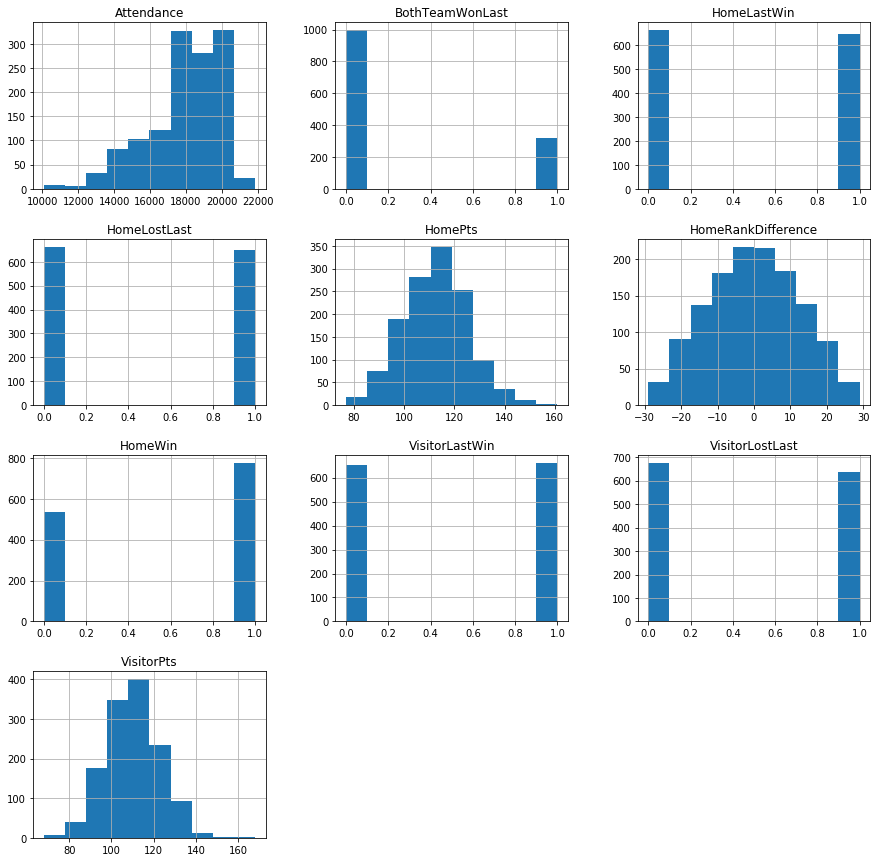

In [68]:
data18.hist(figsize = (15,15))
plt.show()

In [69]:
data18.dtypes

Date                  object
Start(Et)             object
Visitorteam           object
VisitorPts             int64
Hometeam              object
HomePts                int64
Attendance             int64
HomeWin                uint8
HomeLastWin            int64
VisitorLastWin         int64
BothTeamWonLast        int64
HomeLostLast           int64
VisitorLostLast        int64
HomeRankDifference     int64
dtype: object

In [70]:
data18.iloc[:,7:]

,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
0,1,0,0,0,0,0,-1
1,1,0,0,0,0,0,-7
2,0,0,0,0,0,0,4
3,1,0,0,0,0,0,-4
4,0,0,0,0,0,0,-8
...,...,...,...,...,...,...,...
1307,0,1,0,0,0,1,-1
1308,0,1,0,0,0,1,1
1309,0,0,1,0,1,0,1
1310,0,1,0,0,0,1,-1


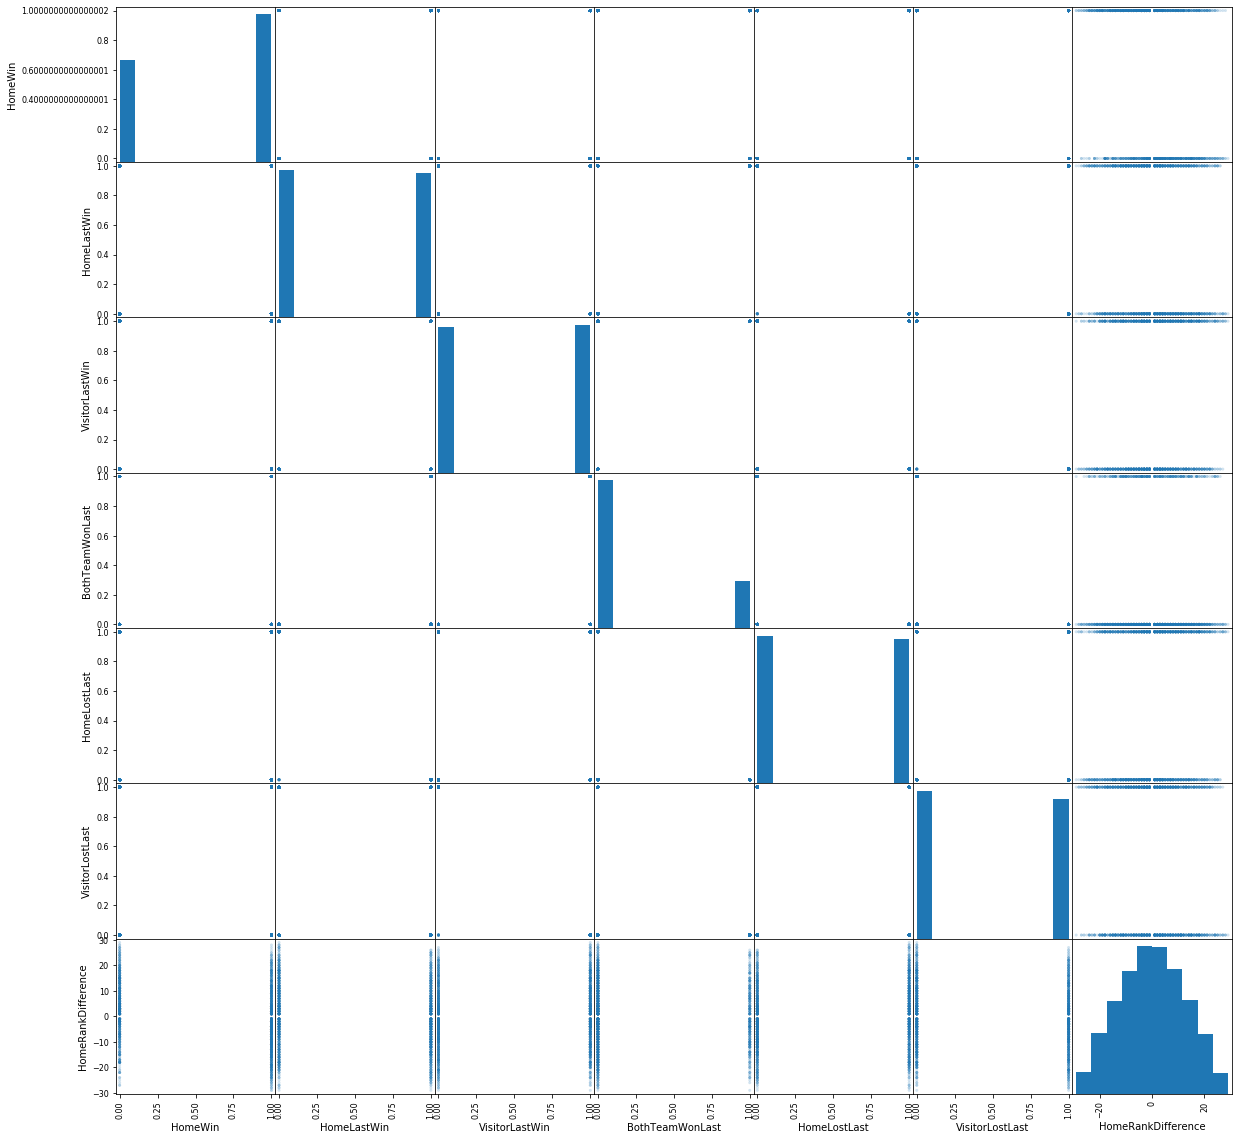

In [71]:
# This was expected as our values are mostly o's or 1's.
# THis suggests no linear relationships
scatter_matrix(data18.iloc[:,7:], alpha =0.2, figsize=(20,20))
plt.show()

In [72]:
data18.corr()


,VisitorPts,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,BothTeamWonLast,HomeLostLast,VisitorLostLast,HomeRankDifference
VisitorPts,1.000000,0.345865,-0.022431,-0.446531,-0.039809,0.037273,0.008823,0.044961,-0.034083,0.136285
HomePts,0.345865,1.000000,-0.026712,0.462782,0.075053,-0.024579,0.040507,-0.074523,0.022707,-0.173275
Attendance,-0.022431,-0.026712,1.000000,-0.001598,0.077382,-0.029307,0.020372,-0.086601,0.018662,-0.198332
HomeWin,-0.446531,0.462782,-0.001598,1.000000,0.098081,-0.029309,0.053405,-0.100344,0.023954,-0.239082
HomeLastWin,-0.039809,0.075053,0.077382,0.098081,1.000000,-0.030409,0.570496,-0.978884,0.051545,-0.119337
VisitorLastWin,0.037273,-0.024579,-0.029307,-0.029309,-0.030409,1.000000,0.560155,0.051915,-0.978877,0.103230
BothTeamWonLast,0.008823,0.040507,0.020372,0.053405,0.570496,0.560155,1.000000,-0.558449,-0.548322,-0.017914
HomeLostLast,0.044961,-0.074523,-0.086601,-0.100344,-0.978884,0.051915,-0.558449,1.000000,-0.036912,0.121990
VisitorLostLast,-0.034083,0.022707,0.018662,0.023954,0.051545,-0.978877,-0.548322,-0.036912,1.000000,-0.100124
HomeRankDifference,0.136285,-0.173275,-0.198332,-0.239082,-0.119337,0.103230,-0.017914,0.121990,-0.100124,1.000000


** The highest correlation of home win seems to come from:**

1) Home pts and visitor pts, becuase it was derived from them, so they are not independent with each other.

2) aside from this, Home win is correlated with Home Rank difference but it is negatively correlated

3) Home win is also correlated with HomeLostLast and VisitorLostLast but it is not that big like with hometeam rank higher.

4) Both team won last is positively correlated but not strongly correlated.

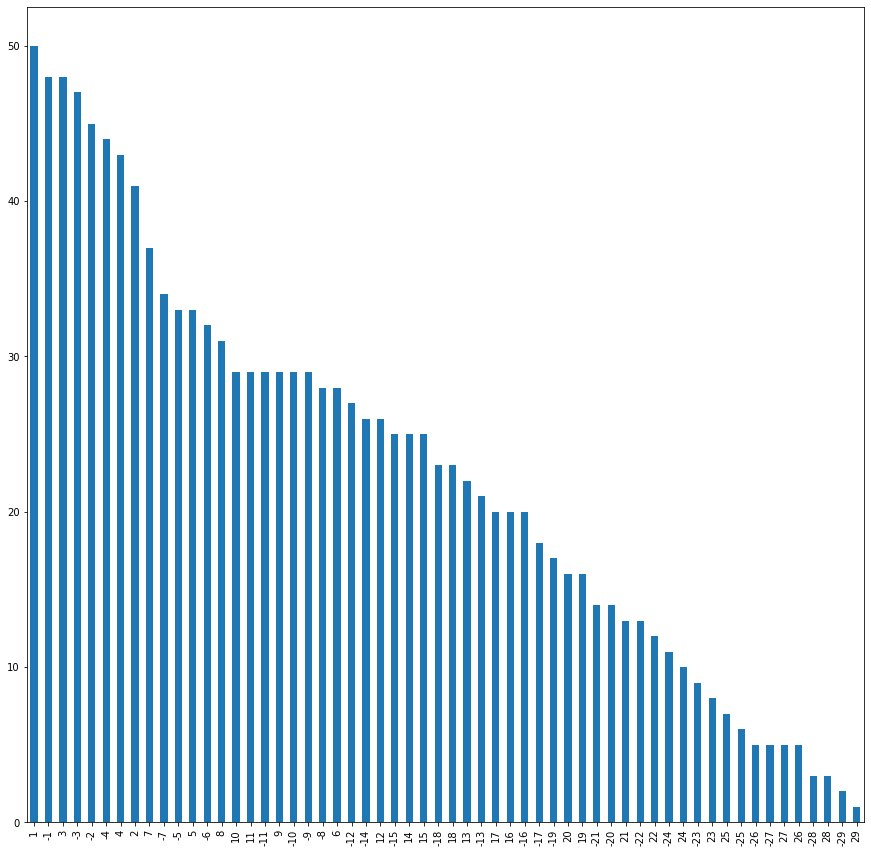

In [73]:
data18['HomeRankDifference'].value_counts().plot.bar(figsize=(15,15))


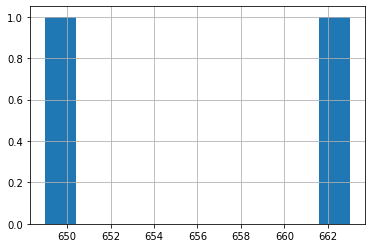

In [74]:
data18['HomeLostLast'].value_counts().hist()

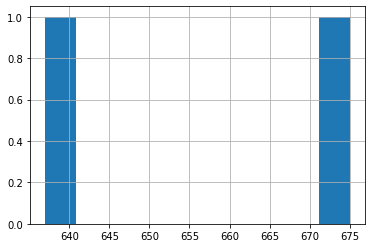

In [75]:
data18['VisitorLostLast'].value_counts().hist()

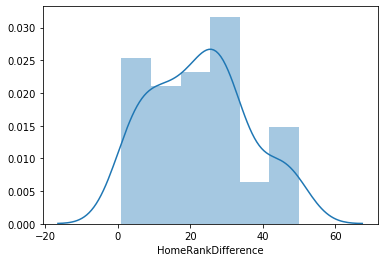

In [76]:
sns.distplot(data18['HomeRankDifference'].value_counts())

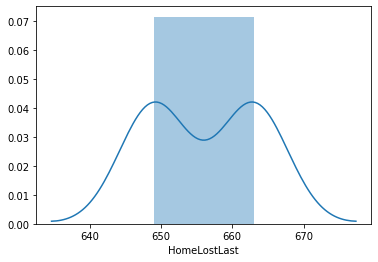

In [77]:
sns.distplot(data18['HomeLostLast'].value_counts())

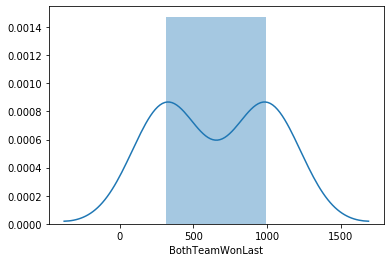

In [78]:
sns.distplot(data18['BothTeamWonLast'].value_counts())

Creating the following ML models and reporting the training and testing accuracy of each:
  - Decision Tree
  - Random Forest
  - XGBoost
  - Logistic Regression
  - Naive Bayes (Gaussian)

Using 80% of the data of 2018-19 for training, and the remainder for testing. Using appropriate pruning and parameter tuning. 

In [79]:
features = data18[['HomeRankDifference','HomeLostLast','VisitorLostLast','BothTeamWonLast']]
target  = data18['HomeWin']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
X_train.tail(5)

,HomeRankDifference,HomeLostLast,VisitorLostLast,BothTeamWonLast
766,18,1,1,0
531,16,1,0,0
913,19,1,0,0
373,-20,0,0,1
126,14,1,1,0


In [81]:
X_train.shape

(1049, 4)

In [101]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier()
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
print(class_tree.score(X_train,y_train))
print(class_tree.score(X_test,y_test))

0.7025738798856054
0.55893536121673


In [103]:
predictions_tree = class_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, predictions_tree)
accuracy_tree

0.55893536121673

In [104]:
class_tree.get_depth()

15

In [107]:
class_tree = DecisionTreeClassifier(max_depth=4) 
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
print(class_tree.score(X_train,y_train))
print(class_tree.score(X_test,y_test))

0.6415633937082936
0.6349809885931559


In [109]:
# Using random forest
from sklearn.ensemble import RandomForestClassifier

In [110]:
model_rf = RandomForestClassifier(n_estimators =250)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))

0.7025738798856054
0.5931558935361216


In [136]:
model_rf = RandomForestClassifier(n_estimators =250, max_depth =4)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))

0.652049571020019
0.6387832699619772


In [138]:
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_rf

0.6387832699619772

In [201]:
y_predicted = model_rf.predict(X_test)


In [140]:
import sys
!{sys.executable} -m pip install xgboost

In [141]:
print(sys.base_prefix)

/home/present/anaconda3


In [142]:
# using XGBoost 
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [143]:
print(model_xgb.score(X_train,y_train))
print(model_xgb.score(X_test,y_test))

0.6568160152526216
0.6463878326996197


In [144]:
model_xgb = XGBClassifier(max_depth=4, min_child_weight=2,colsample_bytree=1, gamma=2)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
print(model_xgb.score(X_train,y_train))
print(model_xgb.score(X_test,y_test))

0.6482364156339371
0.6311787072243346


In [146]:
predictions_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
accuracy_xgb

0.6311787072243346

In [123]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

/home/present/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
print(model_log.score(X_train,y_train))
print(model_log.score(X_test,y_test))

0.6244041944709247
0.6463878326996197


In [148]:
predictions_log = model_log.predict(X_test)
accuracy_log = accuracy_score(y_test, predictions_log)
accuracy_log

0.6463878326996197

In [149]:
# using naive_bayes gaussian NB
from sklearn.naive_bayes import GaussianNB
model_gnb= GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
print(model_gnb.score(X_train,y_train))
print(model_gnb.score(X_test,y_test))

0.6301239275500476
0.6425855513307985


In [151]:
predictions_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, predictions_gnb)
accuracy_gnb

0.6425855513307985

**Findings:**

First,we did the fitting then we did pruning or parametere tuning accordingly. In some cases lok logistic regression and gaussian naive bayes model, we got underfitting of the data even without parameter tuning or pruning.

This suggests that either those models are not suitable for the datasets or we require more feautres.

Analyzing the models to see Which ones were the best and why? Which ones were the worst? What made sense and what didn't? 

In [252]:
print(class_tree.score(X_train,y_train))
print(class_tree.score(X_test,y_test))

0.6415633937082936
0.6349809885931559


In [206]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test, y_test))

0.655862726406101
0.6425855513307985


In [207]:
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test,y_test))

0.6482364156339371
0.6311787072243346


In [209]:
print(model_log.score(X_train, y_train))
print(model_log.score(X_test, y_test))

0.6244041944709247
0.6463878326996197


In [210]:
gnb_score = model_gnb.score(X_test,y_test)
print(model_gnb.score(X_train, y_train))
print(model_gnb.score(X_test,y_test))

0.6301239275500476
0.6425855513307985


**Best models**
Random forest model, decison tree and XGB boost model were the best model. 

**Worst Models**
GNB model and logisitc regresssion model were the worst. These were worst, because the datasets were underfitted this is also a big problem, this suggest this model was not optimatl for this case and we require more features. Note that their score was not very high, so it could be eitherway.

Random forest model made sense because it is highly accurated although it is prone to overfitting, it can be easily pruned and fixed. Also, random forest can be used for classification problem or regression problem, so it works on this perfectly.
Logistic regression model also made good sense, as it is a good estimator for classification questions.
XGB model could have been really good model, but it is very hard to tune the parameters.

Naive bayes model didn't made sense because it usually performs better on problems that have text classification on them, but here it perform really good, which is a little odd.Naive bayes is considered a good ml algorithm as well, but it has more promising results for textual tasks rather than task that was in this project, which is why this was odd. Although, it is faster to train and understand the result.

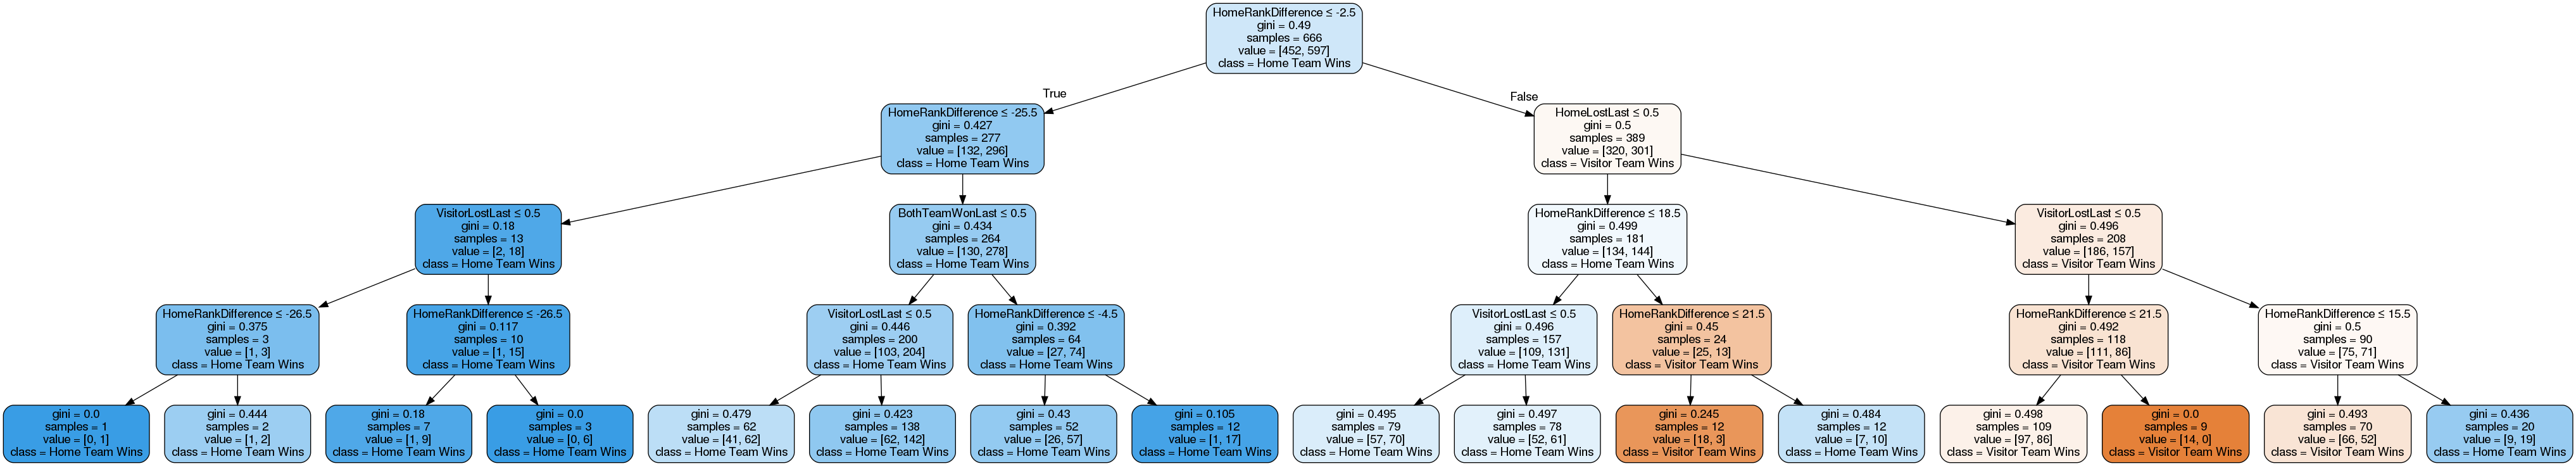

In [251]:
# Plot single tree from the Random Forest
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
single_tree = model_rf.estimators_[200]
export_graphviz(decision_tree=single_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X_train.columns,
                class_names = ['Visitor Team Wins','Home Team Wins'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [226]:
from xgboost import plot_tree


In [246]:
def my_plot_importance(booster, figsize, **kwargs): 

    from xgboost import plot_importance
    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = (100, 100)
    plot_importance(booster=booster)

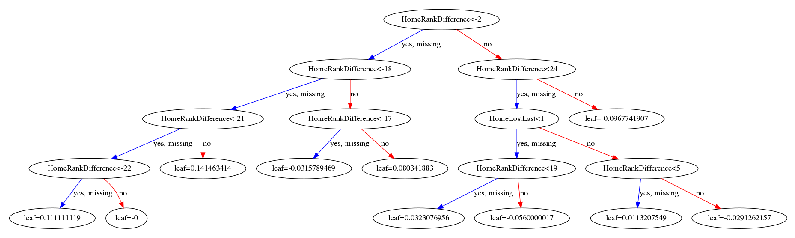

In [247]:
plot_tree(model_xgb)
plt.show()

**Random forest** is considered a good ml algorithm that works on both classification prblem and regresssion problem. Here our dependent variable is classification problem as you either win the home or not. Random forest model is higly accurate and the test score backs this up which was train (0.646329837940896) and  test (0.6311787072243346) accurate.
But, it is lower to train and is prone to overfitting, we can see that before pruning the score was train- 0.7121067683508103 test -0.53231939163498. This was certainly not accurate.

**XGB boost** is great ml model as it does boosting which reduces both variance and bias in the dataset. This model didnot even require any tuning as it gave score of train - 0.6482364156339371
test- 0.6311787072243346. Although, pruning this ml algorithm is very tricky if required.




[Text(334.8, 587.0880000000001, 'X[0] <= -2.5\ngini = 0.485\nsamples = 1049\nvalue = [433, 616]'),
 Text(167.4, 456.624, 'X[0] <= -18.5\ngini = 0.41\nsamples = 441\nvalue = [127, 314]'),
 Text(83.7, 326.1600000000001, 'X[0] <= -20.5\ngini = 0.308\nsamples = 79\nvalue = [15, 64]'),
 Text(41.85, 195.69600000000003, 'X[0] <= -27.5\ngini = 0.37\nsamples = 53\nvalue = [13, 40]'),
 Text(20.925, 65.23200000000008, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(62.775000000000006, 65.23200000000008, 'gini = 0.395\nsamples = 48\nvalue = [13, 35]'),
 Text(125.55000000000001, 195.69600000000003, 'X[2] <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(104.625, 65.23200000000008, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(146.475, 65.23200000000008, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(251.10000000000002, 326.1600000000001, 'X[0] <= -17.5\ngini = 0.427\nsamples = 362\nvalue = [112, 250]'),
 Text(209.25, 195.69600000000003, 'X[1] <= 0.5\ngini = 0.48\nsamples =

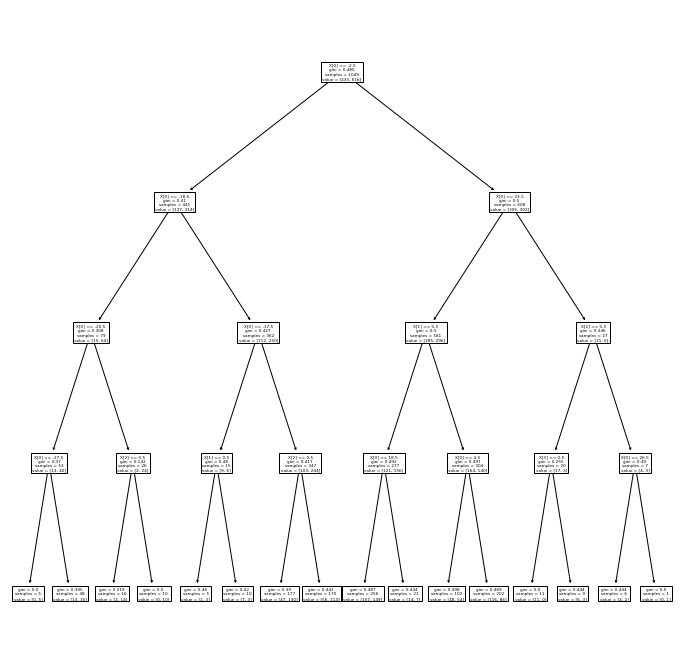

In [158]:
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(class_tree.fit(X_train,y_train))

In [223]:
import sys
!{sys.executable} -m pip install pydotplus

     |████████████████████████████████| 286kB 800kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=0b81f3e72a0f67dae8f24381e118ff0cd68cf837e5008183b0b25142ce9f7dd4
  Stored in directory: /home/present/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [345]:
!{sys.executable} -m pip install graphviz

In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 40,  64],
       [ 30, 129]])

Text(69.0, 0.5, 'Truth')

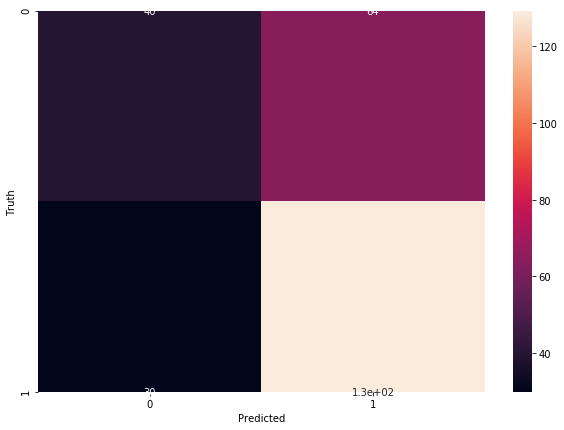

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Testing each ML model from on the current partial year, 2019-2020, and reporting the accuracies for each. Checking if the best model was still the best?

In [161]:
data20 = pd.read_csv('/home/present/Downloads/2020.csv')

In [162]:
data20.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,Box Score,OT,20787,NaN
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,Box Score,NaN,19068,NaN
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,Box Score,NaN,15424,NaN
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,Box Score,NaN,17923,NaN
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,Box Score,NaN,18846,NaN


In [163]:
data20.columns = ['Date','Start(Et)','Visitorteam','VisitorPts','Hometeam','HomePts','BoxScore','OT','Attendance','Notes']

In [164]:
data20.isnull().sum()

Date             0
Start(Et)        0
Visitorteam      0
VisitorPts       0
Hometeam         0
HomePts          0
BoxScore         0
OT             344
Attendance       0
Notes          366
dtype: int64

In [165]:
data20.drop(['OT','Notes'], axis=1, inplace=True)

In [166]:
data20.isnull().sum()

Date           0
Start(Et)      0
Visitorteam    0
VisitorPts     0
Hometeam       0
HomePts        0
BoxScore       0
Attendance     0
dtype: int64

In [167]:
data20['HomeWin'] = data20['HomePts']>data20['VisitorPts']
data20.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,BoxScore,Attendance,HomeWin
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,Box Score,20787,True
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,Box Score,19068,True
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,Box Score,15424,True
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,Box Score,17923,False
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,Box Score,18846,True


In [168]:
data20['HomeWin']=pd.get_dummies(data20['HomeWin'],drop_first=True)

In [174]:
from collections import defaultdict

lost_last_game = defaultdict(int)
data20['HomeLostLast'] = 0
data20['VisitorLostLast'] = 0

In [175]:
for key1, value1 in data20.iterrows():
    home_team = value1['Hometeam']
    visitor_team =  value1['Visitorteam']
    data20.loc[key1, 'HomeLostLast'] = lost_last_game[home_team]
    data20.loc[key1, 'VisitorLostLast'] = lost_last_game[visitor_team]
    
    lost_last_game[visitor_team] = int(value1['HomeWin'])
    lost_last_game[home_team] =1- int(value1['HomeWin'])


data20.tail(10)

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,BoxScore,Attendance,HomeWin,HomeLostLast,VisitorLostLast,HomeRankDifference
356,Wed Dec 11 2019,7:00p,Boston Celtics,117,Indiana Pacers,122,Box Score,15637,1,1,0,4
357,Wed Dec 11 2019,7:00p,Los Angeles Lakers,96,Orlando Magic,87,Box Score,18846,0,1,0,5
358,Wed Dec 11 2019,7:00p,Los Angeles Clippers,112,Toronto Raptors,92,Box Score,20144,0,0,0,-16
359,Wed Dec 11 2019,7:30p,Charlotte Hornets,113,Brooklyn Nets,108,Box Score,15631,0,0,0,3
360,Wed Dec 11 2019,8:00p,Atlanta Hawks,102,Chicago Bulls,136,Box Score,15084,1,1,1,-3
361,Wed Dec 11 2019,8:00p,Utah Jazz,127,Minnesota Timberwolves,116,Box Score,12369,0,1,1,1
362,Wed Dec 11 2019,9:00p,Memphis Grizzlies,115,Phoenix Suns,108,Box Score,12254,0,0,0,1
363,Wed Dec 11 2019,9:30p,New Orleans Pelicans,112,Milwaukee Bucks,127,Box Score,17385,1,0,1,7
364,Wed Dec 11 2019,10:00p,Oklahoma City Thunder,93,Sacramento Kings,94,Box Score,16723,1,0,0,15
365,Wed Dec 11 2019,10:30p,New York Knicks,124,Golden State Warriors,122,Box Score,18064,0,1,1,-19


In [176]:
data20['HomeRankDifference']=0
for index, row in data20.iterrows():
    home_team = row['Hometeam']
    visitor_team = row['Visitorteam']
    home_rank = standings[standings['Team']==home_team]['Rk'].values
    visitor_rank = standings[standings['Team']==visitor_team]['Rk'].values
    data20.loc[index,'HomeRankDifference']=int(home_rank-visitor_rank)
    
data20.head()

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,BoxScore,Attendance,HomeWin,HomeLostLast,VisitorLostLast,HomeRankDifference
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,Box Score,20787,1,0,0,-7
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,Box Score,19068,1,0,0,-3
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,Box Score,15424,1,0,0,-4
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,Box Score,17923,0,0,0,-11
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,Box Score,18846,1,0,0,20


In [177]:
won_last = defaultdict(int)
data18['HomeLastWin'] = 0
data18['VisitorLastWin'] = 0
data18['BothTeamWonLast']=0


In [178]:
for key, value in data20.iterrows():
    home_team = value['Hometeam']
    visitor_team =  value['Visitorteam']
    data20.loc[key, 'HomeLastWin'] = won_last[home_team]
    data20.loc[key, 'VisitorLastWin'] = won_last[visitor_team]
    data20.loc[key, 'BothTeamWonLast'] = (won_last[home_team] & won_last[visitor_team])
    
    won_last[home_team] = int(value['HomeWin'])
    won_last[visitor_team] = 1-int(value['HomeWin'])

data20.tail(10)

,Date,Start(Et),Visitorteam,VisitorPts,Hometeam,HomePts,BoxScore,Attendance,HomeWin,HomeLostLast,VisitorLostLast,HomeRankDifference,HomeLastWin,VisitorLastWin,BothTeamWonLast
356,Wed Dec 11 2019,7:00p,Boston Celtics,117,Indiana Pacers,122,Box Score,15637,1,1,0,4,0.0,1.0,0.0
357,Wed Dec 11 2019,7:00p,Los Angeles Lakers,96,Orlando Magic,87,Box Score,18846,0,1,0,5,0.0,1.0,0.0
358,Wed Dec 11 2019,7:00p,Los Angeles Clippers,112,Toronto Raptors,92,Box Score,20144,0,0,0,-16,1.0,1.0,1.0
359,Wed Dec 11 2019,7:30p,Charlotte Hornets,113,Brooklyn Nets,108,Box Score,15631,0,0,0,3,1.0,1.0,1.0
360,Wed Dec 11 2019,8:00p,Atlanta Hawks,102,Chicago Bulls,136,Box Score,15084,1,1,1,-3,0.0,0.0,0.0
361,Wed Dec 11 2019,8:00p,Utah Jazz,127,Minnesota Timberwolves,116,Box Score,12369,0,1,1,1,0.0,0.0,0.0
362,Wed Dec 11 2019,9:00p,Memphis Grizzlies,115,Phoenix Suns,108,Box Score,12254,0,0,0,1,1.0,1.0,1.0
363,Wed Dec 11 2019,9:30p,New Orleans Pelicans,112,Milwaukee Bucks,127,Box Score,17385,1,0,1,7,1.0,0.0,0.0
364,Wed Dec 11 2019,10:00p,Oklahoma City Thunder,93,Sacramento Kings,94,Box Score,16723,1,0,0,15,1.0,1.0,1.0
365,Wed Dec 11 2019,10:30p,New York Knicks,124,Golden State Warriors,122,Box Score,18064,0,1,1,-19,0.0,0.0,0.0


In [179]:
X = data20[['HomeRankDifference','HomeLostLast','VisitorLostLast','BothTeamWonLast']]
y = data20['HomeWin']

In [180]:
print(class_tree.score(X,y))

0.5846994535519126


In [181]:
predictions_tree20 = class_tree.predict(X)
accuracy_tree20 = accuracy_score(y, predictions_tree20)
accuracy_tree20

0.5846994535519126

In [190]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X,y))

0.655862726406101
0.5792349726775956


In [183]:
predictions_rf20 = model_rf.predict(X)
accuracy_rf20 = accuracy_score(y, predictions_rf20)
accuracy_rf20

0.5792349726775956

In [191]:
print(model_xgb.score(X_train,y_train))
print(model_xgb.score(X,y))

0.6482364156339371
0.592896174863388


In [185]:
predictions_xgb20 = model_xgb.predict(X)
accuracy_xgb20 = accuracy_score(y, predictions_xgb20)
accuracy_xgb20

0.592896174863388

In [186]:
print(model_log.score(X,y))

0.5819672131147541


In [187]:
predictions_log20 = model_log.predict(X)
accuracy_log20 = accuracy_score(y, predictions_log20)
accuracy_log20

0.5819672131147541

In [188]:
print(model_gnb.score(X,y))

0.5628415300546448


In [189]:
predictions_gnb20 = model_gnb.predict(X)
accuracy_gnb20 = accuracy_score(y, predictions_gnb20)
accuracy_gnb20

0.5628415300546448

** Findings:**

Although, XGB boost model was still found to be the best model, but the random forest model scores dropped. This could be because there could be bias in the datasets and random forest follows bagging processs which does not account for bias cases and only accounts for variance cases,

whereas XGB accounts for both bias and variances cases as it follows boosting process. Also, the data is partial this might caused bias in data, and thus creating imperfect interpretation in the models.

**Question 7**<br/>
Do at least two things that you think will improve your model's prediction capabilities for 2019-2020 (ie incorporate more data, engineer another feature, use a new ML model, normalize your data, etc). Insert as many code and text cells as you need.

Re-evaluate: did it improve your model? Give relevant results and visualizations.

In [192]:
from sklearn.preprocessing import StandardScaler
fit_X = StandardScaler().fit(features)
transform_Xtrain = fit_X.transform(features)
tranform_Xtest = fit_X.transform(X)


In [193]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors =15)
model_knn.fit(transform_Xtrain, target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [194]:
print(model_knn.score(X_train, y_train))
print(model_knn.score(X,y))

0.6062917063870352
0.5519125683060109


In [196]:
y_pred = model_knn.predict(X)


In [198]:
from sklearn.metrics import classification_report, confusion_matrix


In [199]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[ 81  74]
 [ 90 121]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.50       155
           1       0.62      0.57      0.60       211

    accuracy                           0.55       366
   macro avg       0.55      0.55      0.55       366
weighted avg       0.56      0.55      0.55       366



**Findings:**

We standardized our data and used a new algorithm K-nearest algorithm which is sometimes also called lazy learning algorithm. KNN is a non parametric algorithm, this means that it doesn't assime anything about the underlying data. This is an useful feature since most of the real word data doesn't follow any theoretical assumptio eg uniform distribution.

But, still the score was 0.5519125683060109 which was smaller than XGB boosting that was obtained which had an accuracy of 0.592896174863388.

The results show that our KNN algorithm was able to classify all the 366 records in the test set with 55% accuracy, which is not that good.

Thus, this did not improve our model, maybe if we add more features or data we can improve them.